In [ ]:
# Install necessary packages
install.packages(c("tidyverse", "randomForest", "caret", "ggplot2", "corrplot","car"))

# Load package
library(tidyverse)
library(randomForest)
library(caret)
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Warning message in install.packages(c("tidyverse", "randomForest", "caret", "ggplot2", :
“installation of package ‘SparseM’ had non-zero exit status”
Warning message in install.packages(c("tidyverse", "randomForest", "caret", "ggplot2", :
“installation of package ‘quantreg’ had non-zero exit status”
Warning message in install.packages(c("tidyverse", "randomForest", "caret", "ggplot2", :
“installation of package ‘car’ had non-zero exit status”


In [ ]:
# Read data
aqi_data <- read.csv("annual_aqi_by_county_2020.csv", stringsAsFactors = FALSE)

# View data structure
str(aqi_data)
head(aqi_data)
summary(aqi_data)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
randomForest 4.7-1.2

Type rfNews() to see new features/cha

'data.frame':	1006 obs. of  18 variables:
 $ State                              : chr  "Alabama" "Alabama" "Alabama" "Alabama" ...
 $ County                             : chr  "Baldwin" "Clay" "DeKalb" "Elmore" ...
 $ Year                               : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ Days.with.AQI                      : int  269 105 364 197 276 366 90 364 348 361 ...
 $ Good.Days                          : int  223 83 332 197 239 119 84 210 188 70 ...
 $ Moderate.Days                      : int  46 22 32 0 37 244 6 154 160 289 ...
 $ Unhealthy.for.Sensitive.Groups.Days: int  0 0 0 0 0 3 0 0 0 2 ...
 $ Unhealthy.Days                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Very.Unhealthy.Days                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hazardous.Days                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Max.AQI                            : int  74 88 91 47 93 129 78 89 78 116 ...
 $ X90th.Percentile.AQI               : int  54 56 49 41 53 70 48 59 62 70

,State,County,Year,Days.with.AQI,Good.Days,Moderate.Days,Unhealthy.for.Sensitive.Groups.Days,Unhealthy.Days,Very.Unhealthy.Days,Hazardous.Days,Max.AQI,X90th.Percentile.AQI,Median.AQI,Days.CO,Days.NO2,Days.Ozone,Days.PM2.5,Days.PM10
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alabama,Baldwin,2020,269,223,46,0,0,0,0,74,54,38,0,0,178,91,0
2,Alabama,Clay,2020,105,83,22,0,0,0,0,88,56,34,0,0,0,105,0
3,Alabama,DeKalb,2020,364,332,32,0,0,0,0,91,49,37,0,0,309,55,0
4,Alabama,Elmore,2020,197,197,0,0,0,0,0,47,41,31,0,0,197,0,0
5,Alabama,Etowah,2020,276,239,37,0,0,0,0,93,53,36,0,0,191,85,0
6,Alabama,Jefferson,2020,366,119,244,3,0,0,0,129,70,54,0,0,58,308,0


    State              County               Year      Days.with.AQI  
 Length:1006        Length:1006        Min.   :2020   Min.   : 17.0  
 Class :character   Class :character   1st Qu.:2020   1st Qu.:331.0  
 Mode  :character   Mode  :character   Median :2020   Median :363.0  
                                       Mean   :2020   Mean   :323.2  
                                       3rd Qu.:2020   3rd Qu.:366.0  
                                       Max.   :2020   Max.   :366.0  
   Good.Days     Moderate.Days   Unhealthy.for.Sensitive.Groups.Days
 Min.   :  0.0   Min.   :  0.0   Min.   :  0.000                    
 1st Qu.:210.0   1st Qu.: 19.0   1st Qu.:  0.000                    
 Median :254.0   Median : 61.0   Median :  0.000                    
 Mean   :246.7   Mean   : 71.9   Mean   :  2.765                    
 3rd Qu.:304.0   3rd Qu.:113.0   3rd Qu.:  2.000                    
 Max.   :365.0   Max.   :289.0   Max.   :103.000                    
 Unhealthy.Days   Very.Unhe

In [ ]:
colSums(is.na(aqi_data))

State                              County 
                                  0                                   0 
                               Year                       Days.with.AQI 
                                  0                                   0 
                          Good.Days                       Moderate.Days 
                                  0                                   0 
Unhealthy.for.Sensitive.Groups.Days                      Unhealthy.Days 
                                  0                                   0 
                Very.Unhealthy.Days                      Hazardous.Days 
                                  0                                   0 
                            Max.AQI                X90th.Percentile.AQI 
                                  0                                   0 
                         Median.AQI                             Days.CO 
                                  0                                   0 
                           Days.NO2                          Days.Ozone 
                                  0                                   0 
                         Days.PM2.5                           Days.PM10 
                                  0                                   0

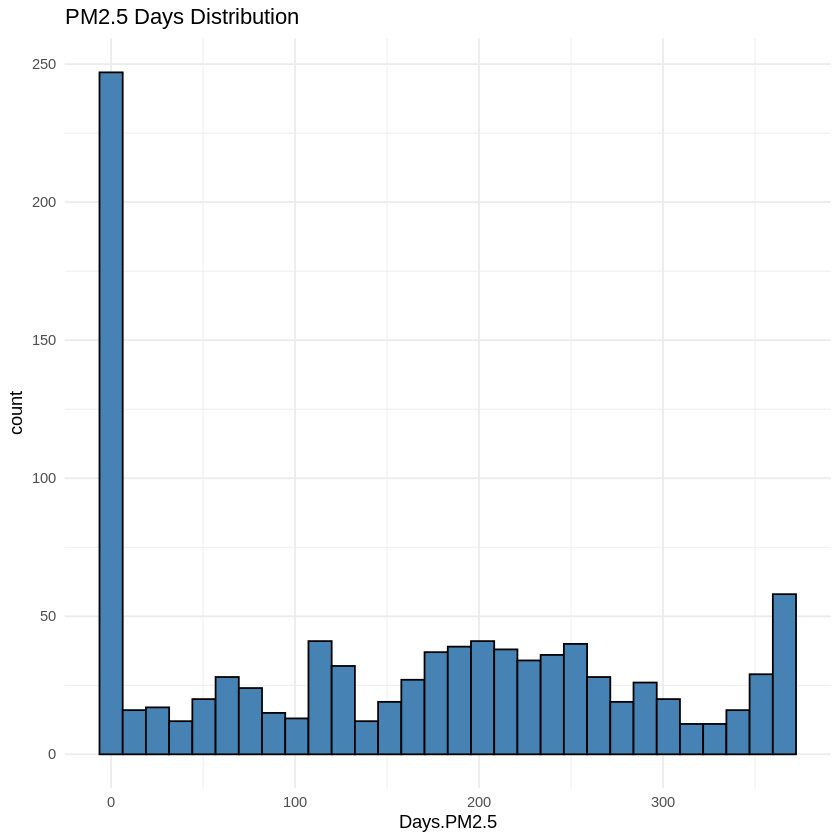

In [ ]:
library(ggplot2)

# Check distribution of PM2.5 days
ggplot(aqi_data, aes(x = Days.PM2.5)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "black") +
  theme_minimal() +
  ggtitle("PM2.5 Days Distribution")

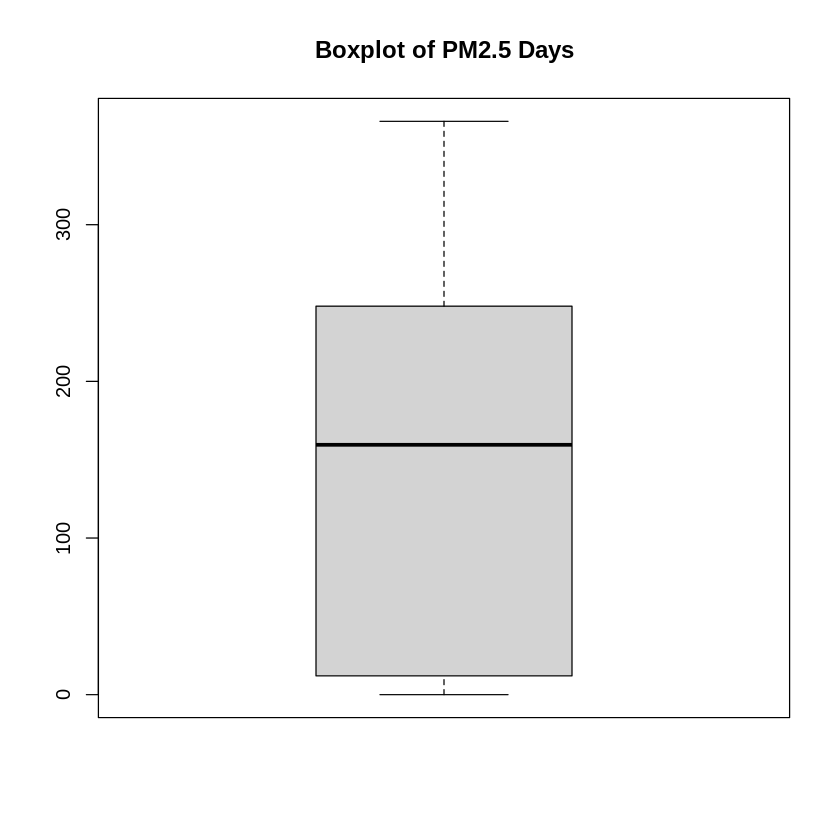

In [ ]:
boxplot(aqi_data$Days.PM2.5, main = "Boxplot of PM2.5 Days")

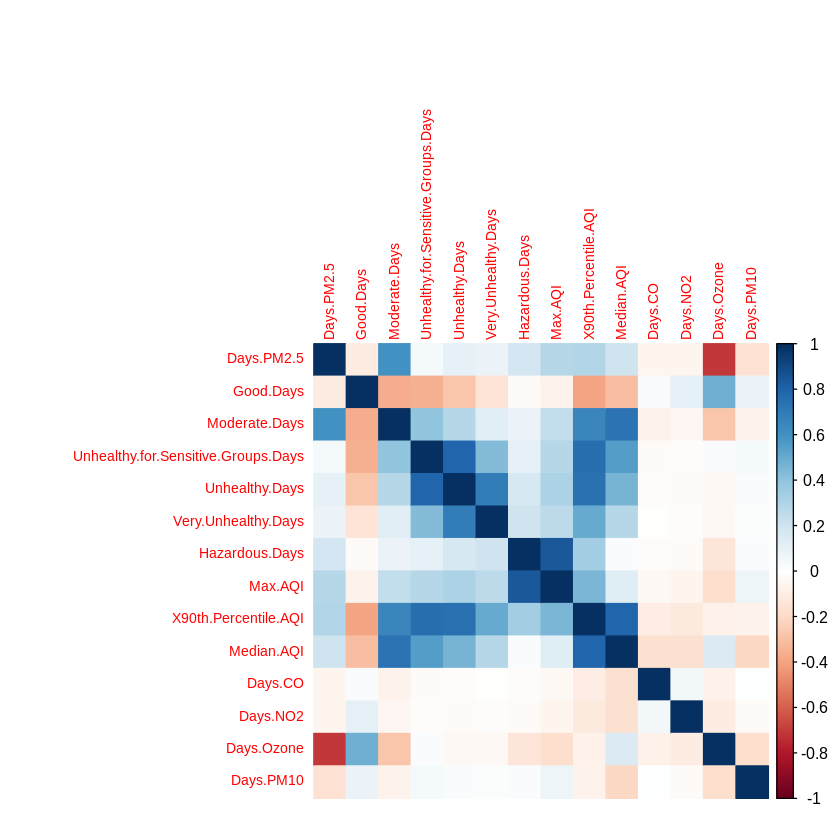

In [ ]:
# Select relevant numeric variables for modeling and remove rows with missing values
model_data <- aqi_data %>%
  select(Days.PM2.5, Good.Days, Moderate.Days,
         Unhealthy.for.Sensitive.Groups.Days, Unhealthy.Days,
         Very.Unhealthy.Days, Hazardous.Days, Max.AQI,
         X90th.Percentile.AQI, Median.AQI, Days.CO, Days.NO2,
         Days.Ozone, Days.PM10) %>%
  na.omit()

# Calculate correlation matrix and visualize it as a colored correlation plot
library(corrplot)
corrplot(cor(model_data), method = "color", tl.cex = 0.7)

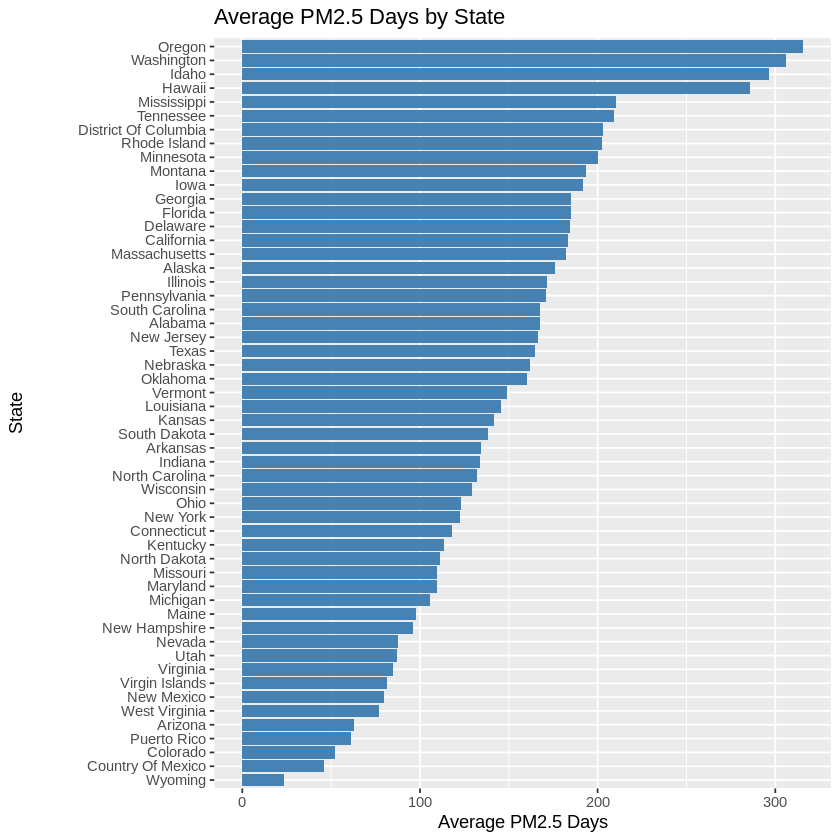

In [ ]:
aqi_data %>%
  group_by(State) %>%
  summarise(Avg_PM25_Days = mean(Days.PM2.5, na.rm = TRUE)) %>%
  arrange(desc(Avg_PM25_Days)) %>%  # Sort states by average PM2.5 days in descending order
  ggplot(aes(x = reorder(State, Avg_PM25_Days), y = Avg_PM25_Days)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +  # Flip coordinates for horizontal bars
  labs(title = "Average PM2.5 Days by State", x = "State", y = "Average PM2.5 Days")


In [ ]:
# Divide into training set and test set
set.seed(123)  # Set the random seed to ensure repeatable results
trainIndex <- createDataPartition(model_data$Days.PM2.5, p = 0.7, list = FALSE)
training <- model_data[trainIndex, ]
testing <- model_data[-trainIndex, ]

In [ ]:
# using AQI and pollutant-related features as predictors, and calculate Variance Inflation Factors (VIF) for each predictor in the model
library(car)

vif_model <- lm(Days.PM2.5 ~ Max.AQI + X90th.Percentile.AQI + Median.AQI + Days.CO +
                Days.NO2 + Days.Ozone + Days.PM10, data = training)
vif(vif_model)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




Max.AQI X90th.Percentile.AQI           Median.AQI 
            1.565602             4.421109             3.846801 
             Days.CO             Days.NO2           Days.Ozone 
            1.038173             1.034037             1.153200 
           Days.PM10 
            1.102258

In [ ]:
# Building the linear regression model
lm_model <- lm(Days.PM2.5 ~ Max.AQI + Median.AQI +X90th.Percentile.AQI+
                 Days.CO + Days.NO2 + Days.Ozone + Days.PM10, data = training)
# show the model
summary(lm_model)


Call:
lm(formula = Days.PM2.5 ~ Max.AQI + Median.AQI + X90th.Percentile.AQI + 
    Days.CO + Days.NO2 + Days.Ozone + Days.PM10, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-364.50  -20.51   22.88   40.19  126.65 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          202.47669   10.53704  19.216  < 2e-16 ***
Max.AQI                0.11437    0.01845   6.199 9.72e-10 ***
Median.AQI             3.12788    0.45985   6.802 2.22e-11 ***
X90th.Percentile.AQI  -0.80281    0.29341  -2.736 0.006374 ** 
Days.CO               -0.87443    0.24521  -3.566 0.000387 ***
Days.NO2              -0.49135    0.12634  -3.889 0.000110 ***
Days.Ozone            -0.83521    0.02383 -35.045  < 2e-16 ***
Days.PM10             -0.72812    0.05813 -12.525  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69.24 on 698 degrees of freedom
Multiple R-squared:  0.6861,	Adjusted R-squared:  0.6

In [ ]:
# Check the model's predictions on the test set
lm_predictions <- predict(lm_model, newdata = testing)

lm_rmse <- sqrt(mean((lm_predictions - testing$Days.PM2.5)^2))
lm_r2 <- cor(lm_predictions, testing$Days.PM2.5)^2
cat("Linear regression model on test data set Prediction Results:\n")
cat("RMSE for linear models:", lm_rmse, "\n")
cat("R² for linear models:", lm_r2, "\n")

Linear regression model on test data set Prediction Results:
RMSE for linear models: 66.68397 
R² for linear models: 0.6935982 


In [ ]:
aqi_2021 <- read.csv("annual_aqi_by_county_2021.csv", stringsAsFactors = FALSE)

In [ ]:
#Predicted PM2.5 exceedance days in 2021 using lm model
pred_2021 <- predict(lm_model, newdata = aqi_2021)


In [ ]:
# actual
actual_2021 <- aqi_2021$Days.PM2.5

# Check the model's PM2.5 prediction for 2021
rmse_2021 <- sqrt(mean((pred_2021 - actual_2021)^2))
mae_2021 <- mean(abs(pred_2021 - actual_2021))
r2_2021 <- 1 - sum((pred_2021 - actual_2021)^2) / sum((actual_2021 - mean(actual_2021))^2)

# output
cat("Linear regression model 2021 Prediction Results:\n")
cat("RMSE:", rmse_2021, "\n")
cat("MAE:", mae_2021, "\n")
cat("R²:", r2_2021, "\n")


Linear regression model 2021 Prediction Results:
RMSE: 66.31451 
MAE: 51.2918 
R²: 0.7208334 


In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



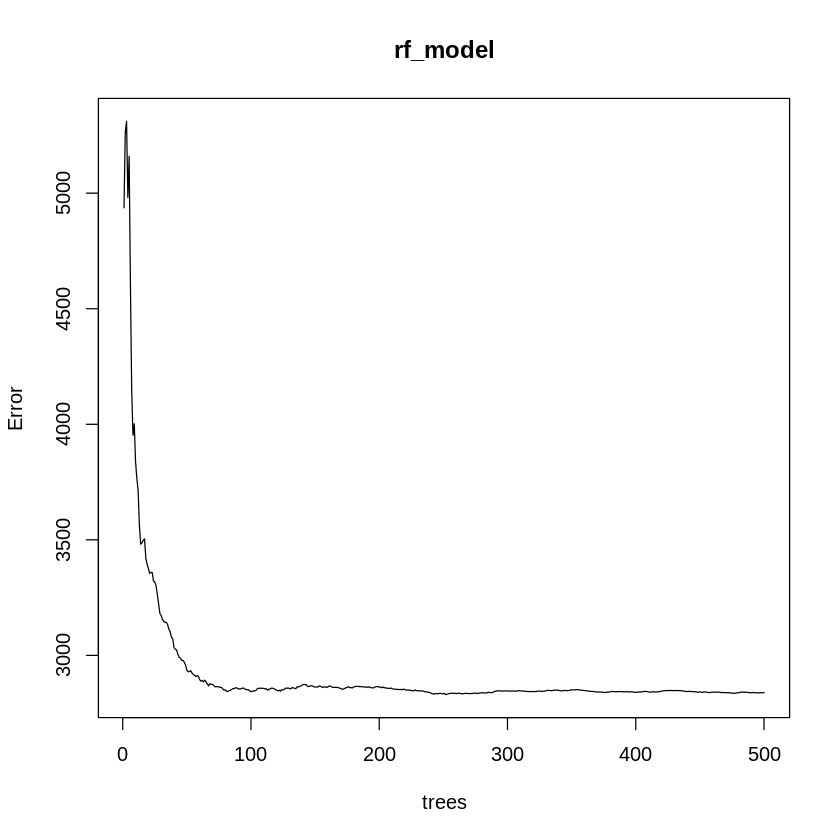

In [ ]:
# Train the model and visualize the error
rf_model <- randomForest(Days.PM2.5 ~ Max.AQI + Median.AQI + Days.CO + Days.NO2 +
                         Days.Ozone + Days.PM10,
                         data = aqi_data,
                         ntree = 500,
                         keep.inbag = TRUE)

# Automatic plotting: Error varies with number of trees
plot(rf_model)

In [ ]:
# Print basic information of the model
print(rf_model)



Call:
 randomForest(formula = Days.PM2.5 ~ Max.AQI + Median.AQI + Days.CO +      Days.NO2 + Days.Ozone + Days.PM10, data = aqi_data, ntree = 500,      keep.inbag = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 2839.426
                    % Var explained: 80.96


In [ ]:
# Calculate OOB RMSE
oob_mse <- rf_model$mse[rf_model$ntree]
oob_rmse <- sqrt(oob_mse)

cat("OOB RMSE:", oob_rmse, "\n")

OOB RMSE: 53.28626 


In [ ]:
summary(rf_model)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       1006   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       1006   -none- numeric  
importance         6   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               1006   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

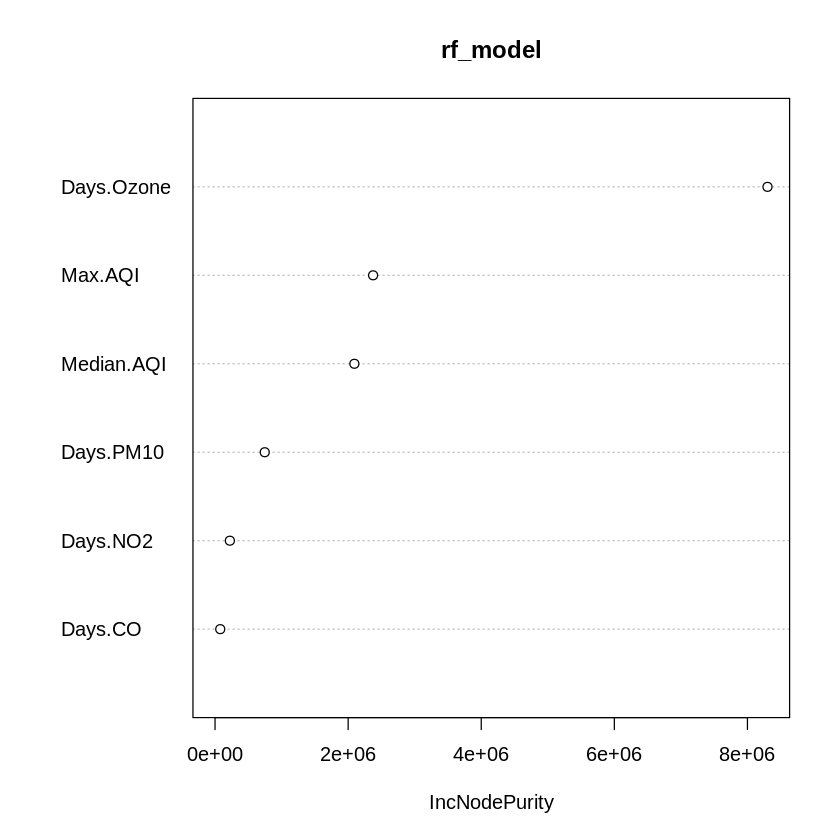

In [ ]:
# feature importance
varImpPlot(rf_model)

In [ ]:
# Random Forest model predicts PM2.5 exceedance days in 2021
rf_predictions <- predict(rf_model, newdata = aqi_2021)

In [ ]:
# Calculate the performance metrics of the random forest model
rf_rmse <- sqrt(mean((rf_predictions - actual_2021)^2))
rf_mae <- mean(abs(rf_predictions - actual_2021))
rf_r2 <- 1 - sum((rf_predictions - actual_2021)^2) / sum((actual_2021 - mean(actual_2021))^2)

# Output results
cat("Random Forest 2021 Prediction Results:\n")
cat("RMSE:", rf_rmse, "\n")
cat("MAE:", rf_mae, "\n")
cat("R²:", rf_r2, "\n")


Random Forest 2021 Prediction Results:
RMSE: 51.61866 
MAE: 31.16601 
R²: 0.8308548 


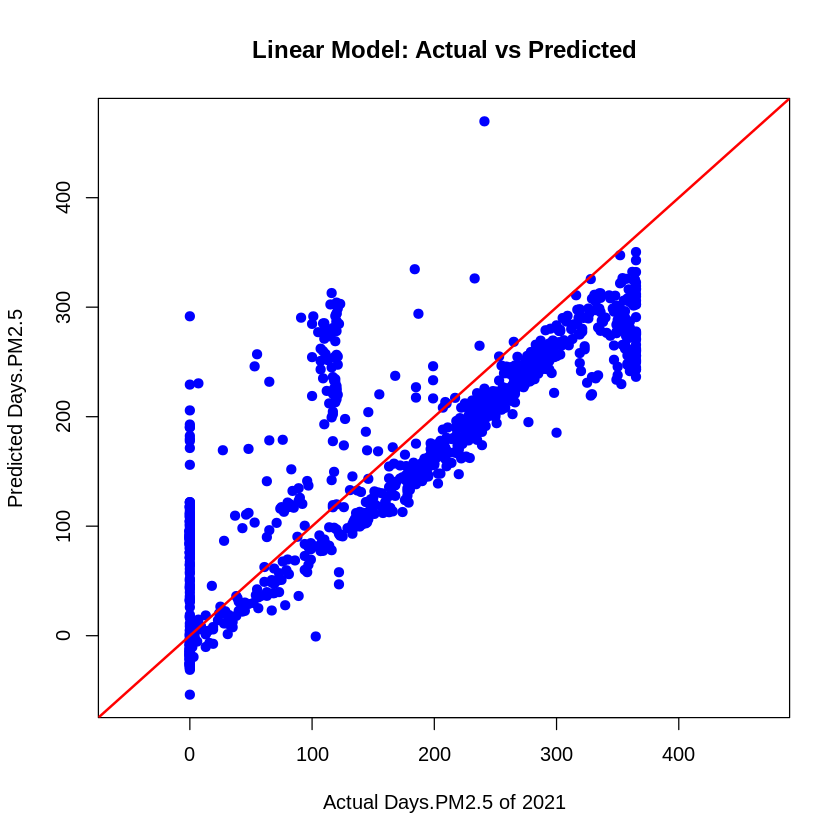

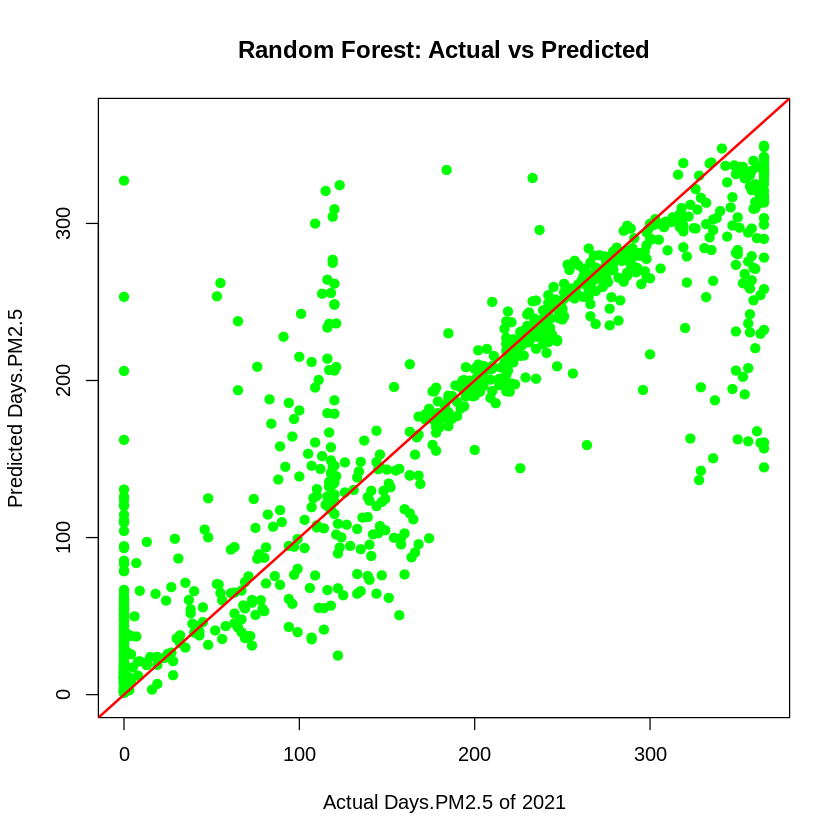

In [ ]:
# Linear regression vs actual
plot(actual_2021, pred_2021, col = "blue", pch = 19,
     xlab = "Actual Days.PM2.5 of 2021", ylab = "Predicted Days.PM2.5",
     main = "Linear Model: Actual vs Predicted",
     xlim = range(c(actual_2021, pred_2021)),
     ylim = range(c(actual_2021, pred_2021)))
abline(0, 1, col = "red", lwd = 2)


# Random Forest vs Actual
plot(actual_2021, rf_predictions, col = "green", pch = 19,
     xlab = "Actual Days.PM2.5 of 2021", ylab = "Predicted Days.PM2.5",
     main = "Random Forest: Actual vs Predicted",
     xlim = range(c(actual_2021, rf_predictions)),
     ylim = range(c(actual_2021, rf_predictions)))
abline(0, 1, col = "red", lwd = 2)